In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [122]:
df_train=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

In [123]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [124]:
#Pclass ==> Survival
df_train.groupby('Pclass').mean()['Survived']

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Pclass', ylabel='count'>

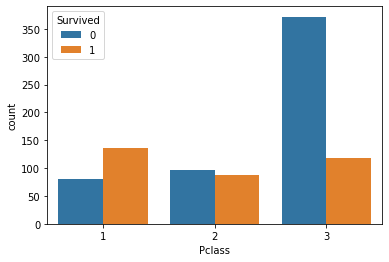

In [125]:
sb.countplot(data=df_train,x='Pclass',hue='Survived')

In [126]:
df_train.groupby('Sex').mean()['Survived']

Sex
female    0.742038
male      0.188908
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Sex', ylabel='count'>

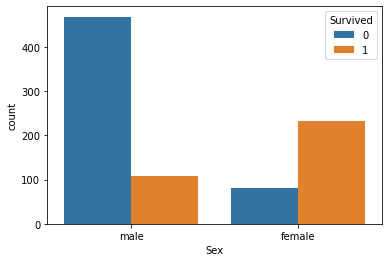

In [127]:
sb.countplot(data=df_train,x='Sex',hue='Survived')

In [128]:
df_train.groupby('Embarked').mean()['Survived']

Embarked
C    0.553571
Q    0.389610
S    0.336957
Name: Survived, dtype: float64

<AxesSubplot:xlabel='Embarked', ylabel='count'>

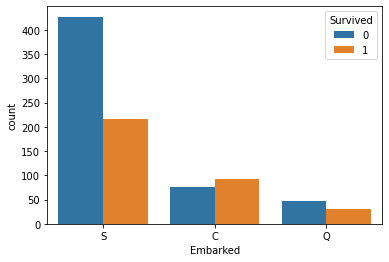

In [129]:
sb.countplot(data=df_train,x='Embarked',hue='Survived')

<AxesSubplot:xlabel='Fare', ylabel='Count'>

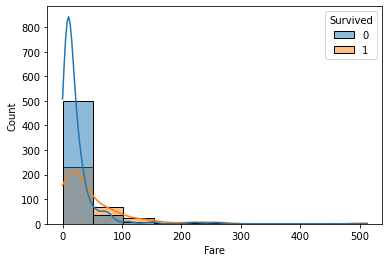

In [130]:
sb.histplot(data=df_train,x='Fare',bins=10,kde=True,hue='Survived')

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

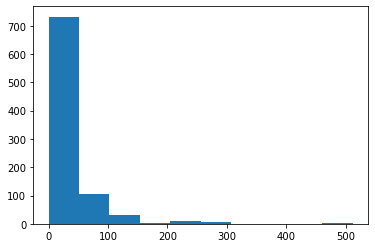

In [131]:
plt.hist(df_train['Fare'],bins=10)

In [195]:
df_train.describe()['Fare']

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

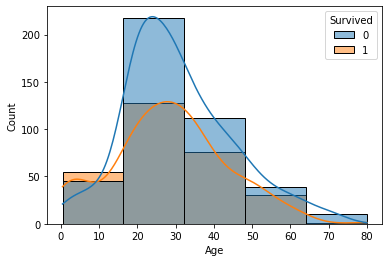

In [132]:
sb.histplot(data=df_train,x='Age',bins=5,kde=True,hue='Survived')

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

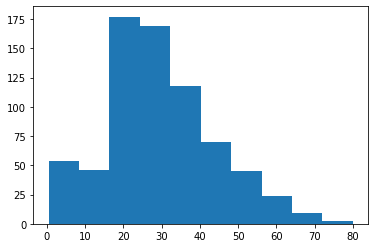

In [133]:
plt.hist(df_train['Age'],bins=10)

In [134]:
df_train.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [135]:
df_test.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [136]:
num_cols = list(df_train.select_dtypes(exclude='object').columns)
num_cols.remove('PassengerId')
num_cols.remove('Survived')
num_cols.remove('Pclass')
num_cols.remove('SibSp')
num_cols.remove('Parch')
num_cols

['Age', 'Fare']

In [137]:
cat_cols = list(df_train.select_dtypes(include='object').columns)
cat_cols.remove('Name')
cat_cols.remove('Ticket')
cat_cols.remove('Cabin')
cat_cols


['Sex', 'Embarked']

In [138]:
num_cat_col = ['Pclass','SibSp','Parch']

In [139]:
# simple imputer

In [140]:
from sklearn.impute import SimpleImputer
imputer_num = SimpleImputer(strategy='median')
imputer_cat = SimpleImputer(strategy='most_frequent')

In [141]:
imputer_num.fit(df_train[num_cols])

SimpleImputer(strategy='median')

In [142]:
df_train[num_cols] = imputer_num.transform(df_train[num_cols])
df_test[num_cols] = imputer_num.transform(df_test[num_cols])

In [143]:
imputer_cat.fit(df_train[cat_cols])

SimpleImputer(strategy='most_frequent')

In [144]:
df_train[cat_cols] = imputer_cat.transform(df_train[cat_cols])
df_test[cat_cols] = imputer_cat.transform(df_test[cat_cols])

In [145]:
imputer_cat.fit(df_train[num_cat_col])

SimpleImputer(strategy='most_frequent')

In [146]:
df_train[num_cat_col] = imputer_cat.transform(df_train[num_cat_col])
df_test[num_cat_col] = imputer_cat.transform(df_test[num_cat_col])

In [147]:
df_train['isCabin']=(~df_train['Cabin'].isna()).astype(int)
df_test['isCabin']=(~df_test['Cabin'].isna()).astype(int)

In [148]:
# Derive new col

In [149]:
df_train['Title'] = df_train['Name'].apply(lambda name:name.split('.')[0].split(' ')[1])
title = list(df_train['Title'].value_counts().iloc[:4].index)
df_train['Title'] = df_train['Title'].apply(lambda X:X if X in title else 'other')

In [150]:
df_test['Title'] = df_test['Name'].apply(lambda name:name.split('.')[0].split(' ')[1])
df_test['Title'] = df_test['Title'].apply(lambda X:X if X in title else 'other')

In [151]:
#binning

In [152]:
df_train['Age']=pd.cut(df_train['Age'],bins=[0,18,df_train['Age'].max()],labels=['Kids','Adult'],include_lowest=True)

In [153]:
df_test['Age']=pd.cut(df_test['Age'],bins=[0,18,df_test['Age'].max()],labels=['Kids','Adult'],include_lowest=True)

In [154]:
df_test['Age'].max()

'Adult'

In [157]:
# feature encoding

In [158]:
cat=['Sex','Age','Embarked','Title']

In [159]:
from sklearn.preprocessing import OneHotEncoder
ohe = OneHotEncoder(sparse=False)
ohe.fit(df_train[cat])

OneHotEncoder(sparse=False)

In [160]:
new_cols = list(ohe.get_feature_names())
new_cols

C:\Users\nehals4545\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0_female',
 'x0_male',
 'x1_Adult',
 'x1_Kids',
 'x2_C',
 'x2_Q',
 'x2_S',
 'x3_Master',
 'x3_Miss',
 'x3_Mr',
 'x3_Mrs',
 'x3_other']

In [161]:
df_train[new_cols] = ohe.transform(df_train[cat])
df_test[new_cols] = ohe.transform(df_test[cat])

In [162]:
df_train['isCabin']=(~df_train['Cabin'].isna()).astype(int)
df_test['isCabin']=(~df_test['Cabin'].isna()).astype(int)

In [163]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,x1_Adult,x1_Kids,x2_C,x2_Q,x2_S,x3_Master,x3_Miss,x3_Mr,x3_Mrs,x3_other
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,Adult,1,0,PC 17599,71.2833,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [164]:
# Feature selection

In [165]:
df_train.corr()['Survived']

PassengerId   -0.005007
Survived       1.000000
Pclass        -0.338481
SibSp         -0.035322
Parch          0.081629
Fare           0.257307
isCabin        0.316912
x0_female      0.543351
x0_male       -0.543351
x1_Adult      -0.105873
x1_Kids        0.105873
x2_C           0.168240
x2_Q           0.003650
x2_S          -0.149683
x3_Master      0.085221
x3_Miss        0.329999
x3_Mr         -0.529008
x3_Mrs         0.340572
x3_other      -0.018304
Name: Survived, dtype: float64

In [166]:
final_col= list(df_train.corr()['Survived'].index)
final_col.remove('PassengerId')
final_col.remove('Survived')

In [167]:
final_col

['Pclass',
 'SibSp',
 'Parch',
 'Fare',
 'isCabin',
 'x0_female',
 'x0_male',
 'x1_Adult',
 'x1_Kids',
 'x2_C',
 'x2_Q',
 'x2_S',
 'x3_Master',
 'x3_Miss',
 'x3_Mr',
 'x3_Mrs',
 'x3_other']

{'whiskers': [<matplotlib.lines.Line2D at 0x741d7a3e50>,
 'caps': [<matplotlib.lines.Line2D at 0x741d785100>,
 'boxes': [<matplotlib.lines.Line2D at 0x741d7a44c0>],
 'medians': [<matplotlib.lines.Line2D at 0x741d785940>],
 'fliers': [<matplotlib.lines.Line2D at 0x741d785730>],
 'means': []}

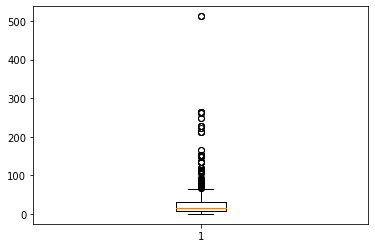

In [196]:
plt.boxplot(df_train['Fare'])

In [198]:
# IQR
percentile25= df_train['Fare'].quantile(0.25)
percentile75= df_train['Fare'].quantile(0.75)

In [199]:
percentile75

31.0

In [200]:
percentile25

7.9104

In [201]:
iqr=percentile75-percentile25
iqr

23.0896

In [202]:
uper_limit = percentile75 + 1.5 * iqr
lower_limit = percentile25 - 1.5 * iqr

In [203]:
uper_limit,lower_limit

(65.6344, -26.724)

In [204]:
df_train[df_train['Fare'] > uper_limit]['Fare']

1       71.2833
27     263.0000
31     146.5208
34      82.1708
52      76.7292
         ...   
846     69.5500
849     89.1042
856    164.8667
863     69.5500
879     83.1583
Name: Fare, Length: 116, dtype: float64

# Trimming

In [205]:
df_train_new=df_train[df_train['Fare'] < uper_limit]
df_train_new

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,x1_Adult,x1_Kids,x2_C,x2_Q,x2_S,x3_Master,x3_Miss,x3_Mr,x3_Mrs,x3_other
0,1,0,3,"Braund, Mr. Owen Harris",male,Adult,1,0,A/5 21171,7.2500,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,Adult,0,0,STON/O2. 3101282,7.9250,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,Adult,1,0,113803,53.1000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,5,0,3,"Allen, Mr. William Henry",male,Adult,0,0,373450,8.0500,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
5,6,0,3,"Moran, Mr. James",male,Adult,0,0,330877,8.4583,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,Adult,0,0,211536,13.0000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
887,888,1,1,"Graham, Miss. Margaret Edith",female,Adult,0,0,112053,30.0000,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,Adult,1,2,W./C. 6607,23.4500,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
889,890,1,1,"Behr, Mr. Karl Howell",male,Adult,0,0,111369,30.0000,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [168]:
# scalling

In [169]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [170]:
scaler=MinMaxScaler()

In [171]:
scaler.fit(df_train[final_col])

MinMaxScaler()

In [172]:
x_trains = scaler.transform(df_train[final_col])

In [173]:
x_tests = scaler.transform(df_test[final_col])

In [174]:
s_scaler = StandardScaler()

In [206]:
s_scaler.fit(df_train_new[final_col])

StandardScaler()

In [207]:
x_strain = s_scaler.transform(df_train_new[final_col])

In [208]:
x_stest = s_scaler.transform(df_test[final_col])

In [178]:
# Model building

In [179]:
x=df_train[final_col]
y=df_train['Survived']

In [212]:
ys=df_train_new['Survived']

In [2]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [4]:

dict1={'n_estimators':[75,100,150,200],
       'max_depth':[6,7,8],
       'min_samples_leaf':[2,3,4],
       'min_samples_split':[2,3,4]}


In [5]:
grid_cv = GridSearchCV(RandomForestClassifier(random_state=17), param_grid=dict1,cv=5,verbose=3)

In [214]:
grid_cv.fit(x_strain,ys)

Fitting 5 folds for each of 108 candidates, totalling 540 fits
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.2s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=75; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=6, min_samples_leaf=2, min_samples_split=2, n_estimators=100; total time=   0.2s
[CV] END max_depth=6, min_samples_leaf=2, 

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=17),
             param_grid={'max_depth': [6, 7, 8], 'min_samples_leaf': [2, 3, 4],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 150, 200]},
             verbose=2)

In [215]:
yp=grid_cv.predict(x_stest)

In [216]:
df_submission = pd.DataFrame({'PassengerId':df_test['PassengerId'], 'Survived':yp})

In [217]:
df_submission.to_csv('grid_cv_f8.csv', index=False)

In [218]:
grid_cv.best_estimator_

RandomForestClassifier(max_depth=6, min_samples_leaf=4, n_estimators=75,
                       random_state=17)

In [219]:
grid_cv.best_params_

{'max_depth': 6,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 75}